# **Sales Prediction Using Python**

In [61]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [62]:
# Import the requried dataset
df_adv = pd.read_csv("D:\Intellipaat\Datasets\Advertising.csv")
df_adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Exploratory Data Analysis

In [63]:
# Counts of Rows & Columns in dataset

print("Number of rows are: ",df_adv.shape[0])
print("Number of columns are: ",df_adv.shape[1])

Number of rows are:  200
Number of columns are:  5


In [64]:
# Dataset Info
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [65]:
# Check for the duplicates in dataset
dup = df_adv.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [66]:
# Check for the null values in dataset
df_adv.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Inference
* The Advertising dataset consists of Sales of TV, Radio and Newspaper.
* There are 200 rows and 5 columns provided in the data.
* No duplicate values exist in the dataset.
* Null values not exist in the dataset.

In [67]:
# Dataset Describe (all columns included)
df_adv.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [68]:
# Check Unique Values for each variable.
for i in df_adv.columns.tolist():
  print("No. of unique values in",i,"is",df_adv[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


In [69]:
# Removing the 'Unnamed: 0' column as it's no longer needed
df_adv.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [70]:
# New updated DataFrame
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:
# Defining dependent variable
dependent_variable = ['Sales']

## Visualization

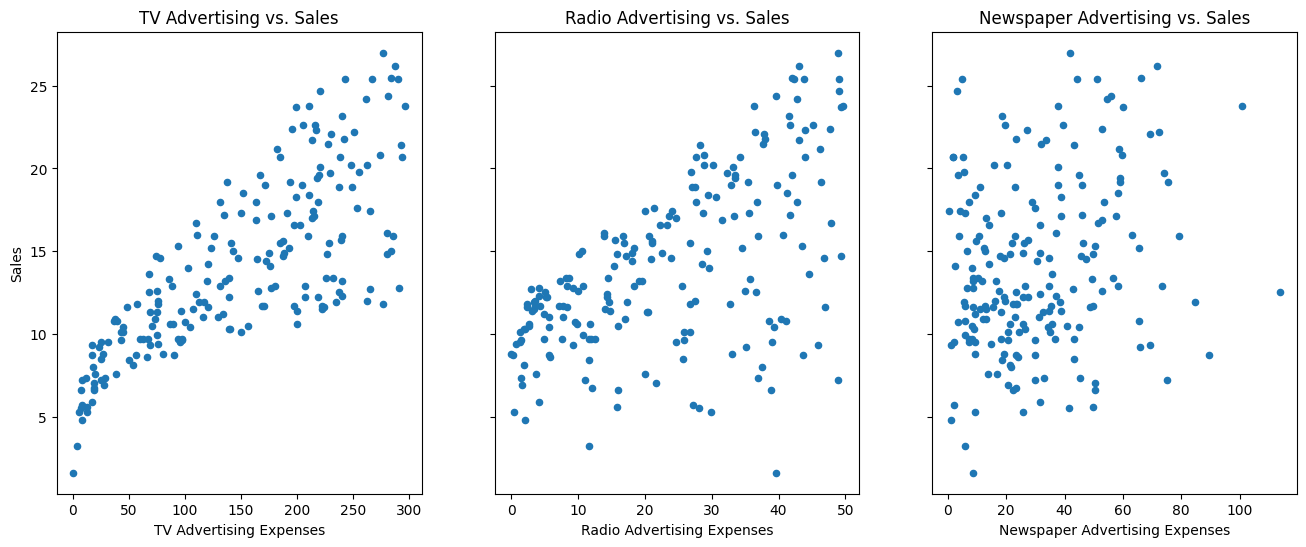

In [72]:
# Chart - 1 Scatterplot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs Sales
df_adv.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs Sales
df_adv.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs Sales
df_adv.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()

### Inference

From the above plots we can analyse that:
* Sales are increasing for both increases of TV advertising and Radio advertising expenses.
* Outliers are present in Newspaper advertising vs. Sales graph.

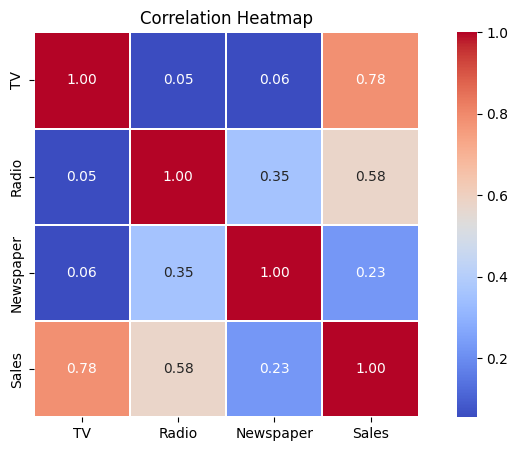

In [73]:
# Chart - 2 - Correlation Heatmap
# Correlation Heatmap visualization code

plt.figure(figsize=(10, 5))
sns.heatmap(df_adv.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Inference
- From the above correlation heatmap we get to know that, TV Advertising expenses and Sales are highly correlated.

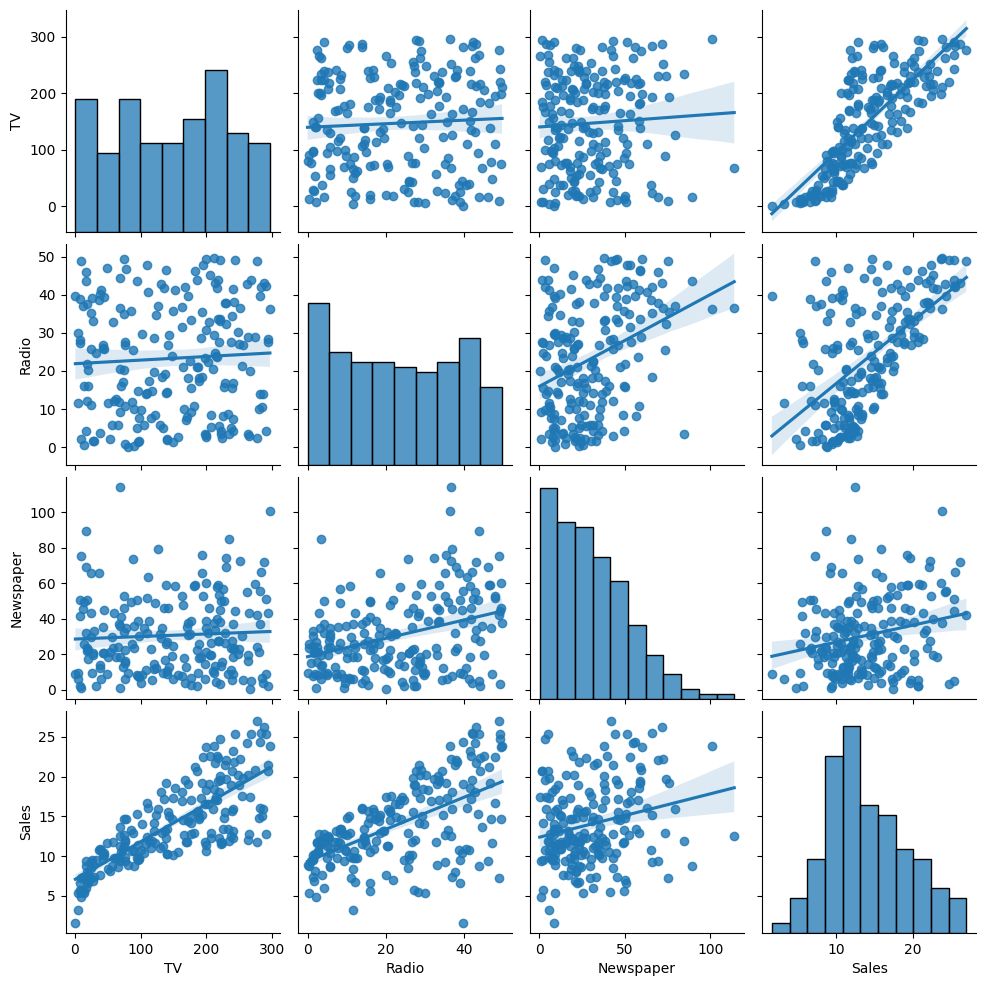

In [74]:
# Chart - 3 Pair plot visualization code

sns.pairplot(df_adv,kind="reg")
plt.show()

## **Feature Engineering & Data Pre-processing**

### 1. Outlier handling

In [75]:
# Removing the outlier from newspaper
df=df_adv[df_adv['Newspaper']<=90]

### 2. Feature selection

In [76]:
# Select the features wisely to avoid overfitting

features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [77]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [78]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [79]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [80]:
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [81]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [82]:
# Final data for modeling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### What all feature selection methods have i used  and why?

I check the multicollinearity using VIF for the continuous features present in the dataframe.

##### Which all features i found important and why?

I take all the numerical variable from the dataset exclude 'Sales' variable, as our features.

### 3. Data Transformation

Check whether the data need to be transformed or not.

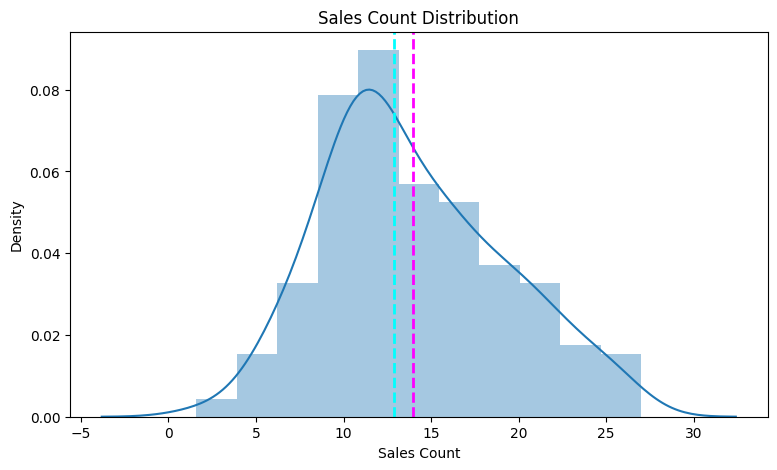

In [83]:
# Transform the data
# Visualizing the distribution of the dependent variable - Sales
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [84]:
# Skew of the dependent variable
df[dependent_variable].skew()

Sales    0.40713
dtype: float64

In [85]:
# Defining dependent and independent variables
X = df.drop('Sales',axis=1)
y = df[dependent_variable]

In [86]:
features

['TV', 'Radio', 'Newspaper']

I have ploted distribution plot and also i did normality test and i have found that the data is perfectly normally distributed <br/> 
and the skewness value is also very well, so it didn't needs any transformation.

### 4. Data Scaling

In [87]:
features = [i for i in df.columns if i not in ['Sales']]

In [88]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

##### Which method have i used to scale the data and why?

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

### 5. Data Splitting

In [89]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Sales
9.7      4
15.9     3
20.7     3
12.2     3
11.8     3
        ..
12.4     1
12.3     1
11.2     1
10.9     1
27.0     1
Name: count, Length: 109, dtype: int64

## **6. ML Model Implementation**

In [91]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [92]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Linear Regression

In [93]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

##### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 2.43207668246954
RMSE : 1.5595116807736773
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000559
Adjusted R2 :  0.9023858555583939


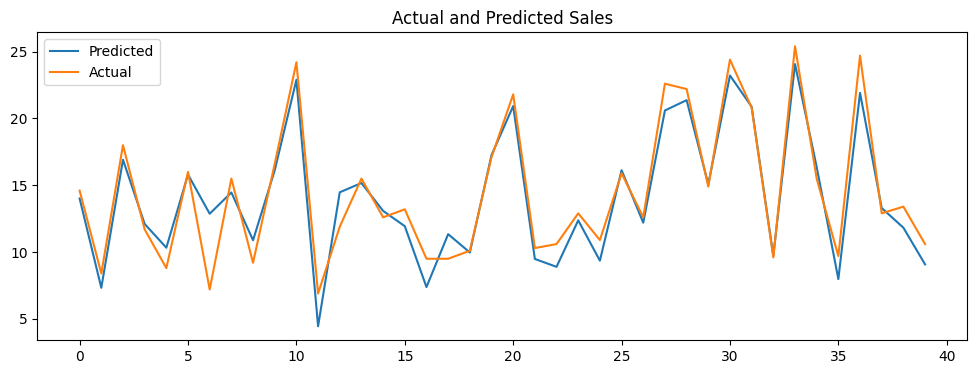

In [94]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [95]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


##### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [97]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8794637215026521


In [98]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.43207668246954
RMSE : 1.5595116807736773
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000559
Adjusted R2 :  0.9023858555583939


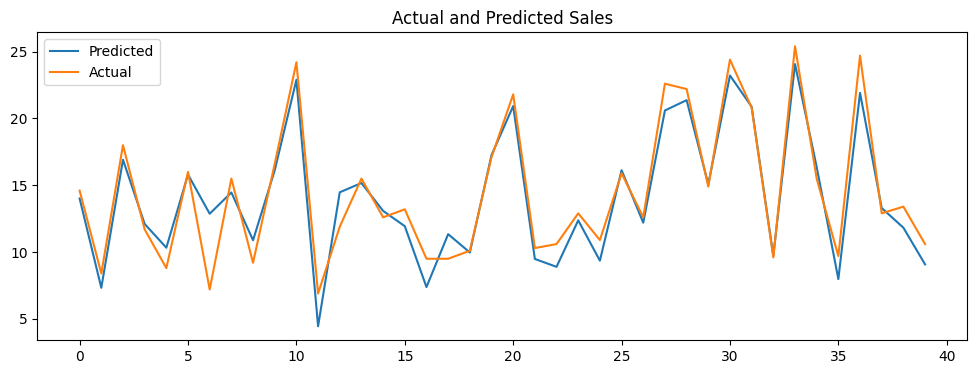

In [100]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [101]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,2.432077,2.432077
RMSE,1.559512,1.559512
MAE,1.177153,1.177153
Train R2,0.889832,0.889832
Test R2,0.909895,0.909895
Adjusted R2,0.902386,0.902386


### ML Model - 2 : Decision Tree

In [102]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 1.3222499999999997
RMSE : 1.1498912992104948
MAE : 0.9125
Train R2 : 1.0
Test R2 : 0.9510123103683663
Adjusted R2 :  0.9469300028990635


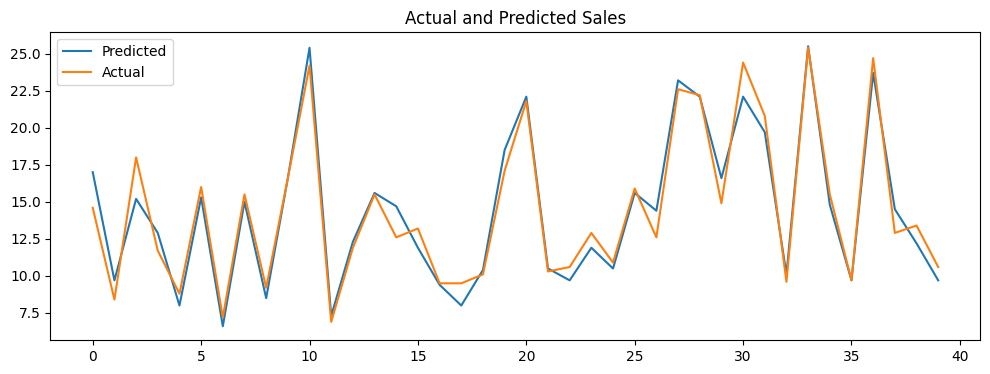

In [103]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [104]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree
MSE,2.432077,2.432077,1.322250
RMSE,1.559512,1.559512,1.149891
MAE,1.177153,1.177153,0.912500
Train R2,0.889832,0.889832,1.000000
Test R2,0.909895,0.909895,0.951012
Adjusted R2,0.902386,0.902386,0.946930


### Inference
- From the decision tree algorithm i got train R2 score is 1 and test R2 score is 95% which shows the overfitting condition on train set.
- So, i have decided to tune the data using GridSearchCV.

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [106]:
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [107]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [108]:
# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [109]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE : 4.853930208143661
RMSE : 2.2031636816504716
MAE : 1.7902569055944055
Train R2 : 0.8705971402540121
Test R2 : 0.8201680268253714
Adjusted R2 :  0.805182029060819


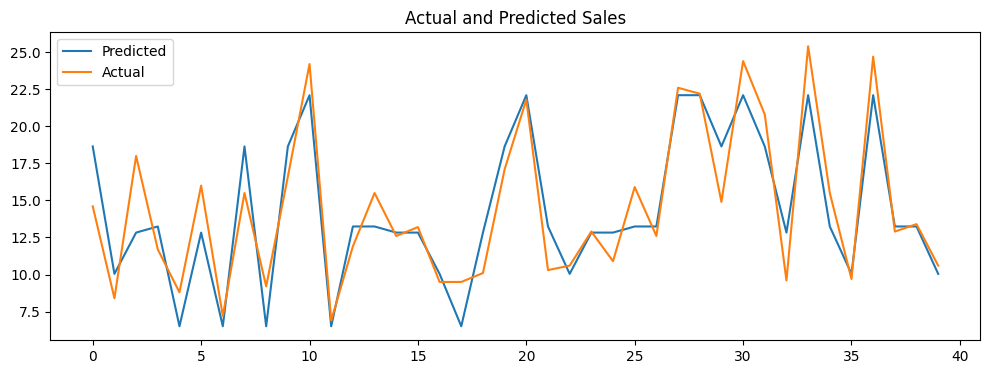

In [110]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

In [112]:
# Updated Evaluation Metric Score Chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned
MSE,2.432077,2.432077,1.322250,4.853930
RMSE,1.559512,1.559512,1.149891,2.203164
MAE,1.177153,1.177153,0.912500,1.790257
Train R2,0.889832,0.889832,1.000000,0.870597
Test R2,0.909895,0.909895,0.951012,0.820168
Adjusted R2,0.902386,0.902386,0.946930,0.805182


###  Inference :- 
- From the above tuned Decision tree regression, it has seen that earlier we have faced overfitting condition. <br/> 
- After tuning it there is no such condition and it looks like model performs with good accuracy around 87% on train and 82% on test data.

### ML Model - 3 : Random Forest

In [113]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

##### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 0.5587373749999969
RMSE : 0.747487374475313
MAE : 0.6071249999999965
Train R2 : 0.9969560499583574
Test R2 : 0.9792994871528882
Adjusted R2 :  0.9775744444156289


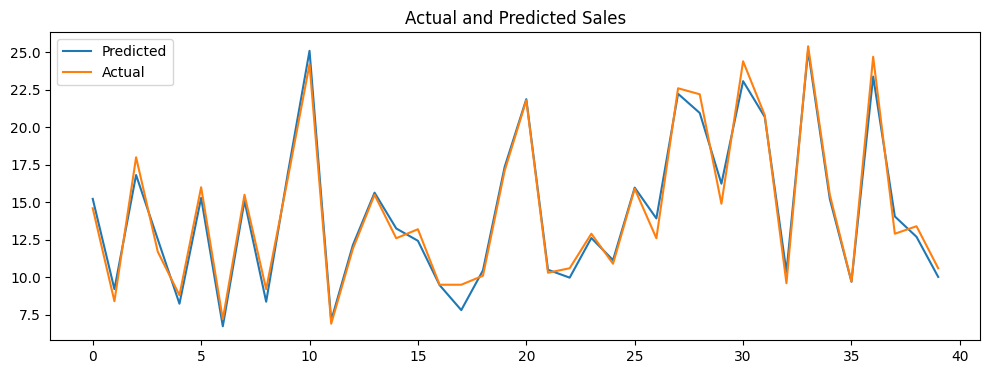

In [114]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [115]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned,Random forest
MSE,2.432077,2.432077,1.322250,4.853930,0.558737
RMSE,1.559512,1.559512,1.149891,2.203164,0.747487
MAE,1.177153,1.177153,0.912500,1.790257,0.607125
Train R2,0.889832,0.889832,1.000000,0.870597,0.996956
Test R2,0.909895,0.909895,0.951012,0.820168,0.979299
Adjusted R2,0.902386,0.902386,0.946930,0.805182,0.977574


### Inference 
- Here i have seen that using random forest, regression accuracy of the train and test model increases 99% and 97% respectively, <br/> 
which seems to be a good model for prediction.

#### 2. Cross- Validation & Hyperparameter Tuning

In [116]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [117]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [118]:
# Best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [119]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [120]:
# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [121]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 4.290102078955843
RMSE : 2.071256159666361
MAE : 1.6948545471585574
Train R2 : 0.8424349168186637
Test R2 : 0.8410571456744826
Adjusted R2 :  0.8278119078140229


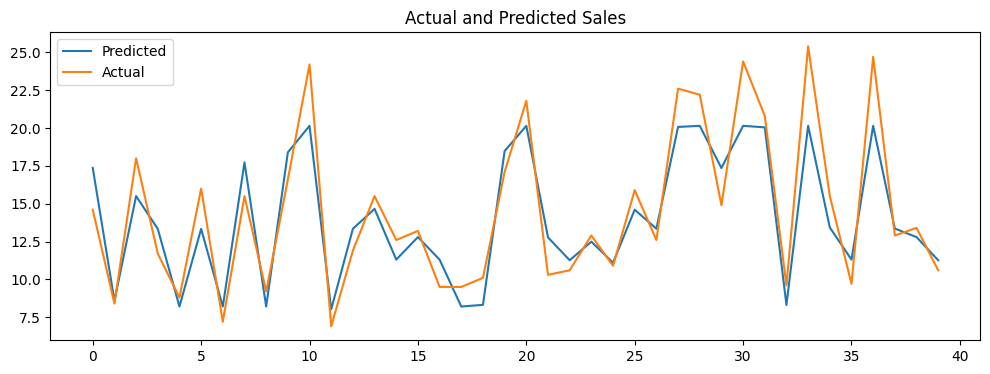

In [122]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

In [123]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned,Random forest,Random forest tuned
MSE,2.432077,2.432077,1.322250,4.853930,0.558737,4.290102
RMSE,1.559512,1.559512,1.149891,2.203164,0.747487,2.071256
MAE,1.177153,1.177153,0.912500,1.790257,0.607125,1.694855
Train R2,0.889832,0.889832,1.000000,0.870597,0.996956,0.842435
Test R2,0.909895,0.909895,0.951012,0.820168,0.979299,0.841057
Adjusted R2,0.902386,0.902386,0.946930,0.805182,0.977574,0.827812


### Inference
- After tuning the random forest model it has seen that there is drop in performance both in train and test score, <br/> 
so i am not going to use the tuned model.

### ML Model - 4 : Gradient Boosting Regressor

In [124]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

##### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 0.49401210897574116
RMSE : 0.7028599497593679
MAE : 0.5412333923464919
Train R2 : 0.9987323273593703
Test R2 : 0.9816974763707526
Adjusted R2 :  0.9801722660683153


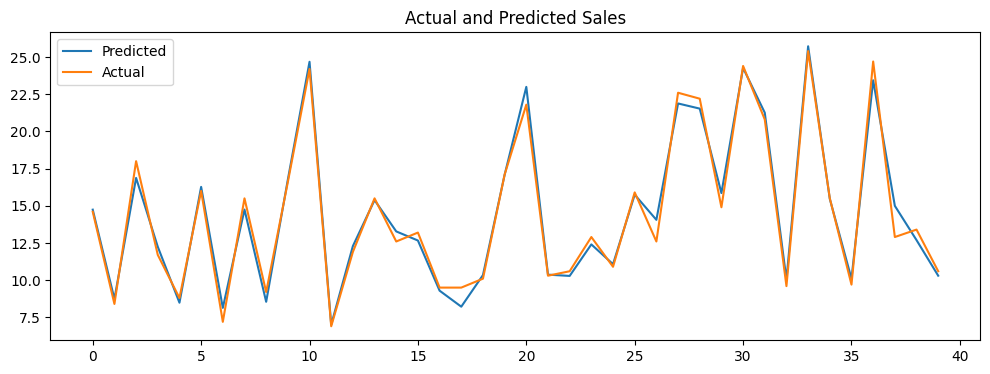

In [125]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [126]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,2.432077,2.432077,1.322250,4.853930,0.558737,4.290102,0.494012
RMSE,1.559512,1.559512,1.149891,2.203164,0.747487,2.071256,0.702860
MAE,1.177153,1.177153,0.912500,1.790257,0.607125,1.694855,0.541233
Train R2,0.889832,0.889832,1.000000,0.870597,0.996956,0.842435,0.998732
Test R2,0.909895,0.909895,0.951012,0.820168,0.979299,0.841057,0.981697
Adjusted R2,0.902386,0.902386,0.946930,0.805182,0.977574,0.827812,0.980172


### Inference
- Using Gradient Boosting Regressor i have got accuracy around 99% and 98% on train and test data respectively.<br/>
Looking like, somehow overfitted also.

So, let's try the tuned model also.

#### 2. Cross- Validation & Hyperparameter Tuning

In [127]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [128]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [129]:
# Best parameters for Gradient Boosting Model
gb_best_params

{'n_estimators': 300, 'min_samples_leaf': 20, 'max_depth': 14}

In [130]:
# Building Gradient Boosting Model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [131]:
# Fitting model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=14, min_samples_leaf=20, n_estimators=300,
                          random_state=0)

In [132]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)

MSE : 1.3201533198412574
RMSE : 1.148979251266644
MAE : 0.7837158154098387
Train R2 : 0.9957585015456342
Test R2 : 0.9510899897155951
Adjusted R2 :  0.947014155525228


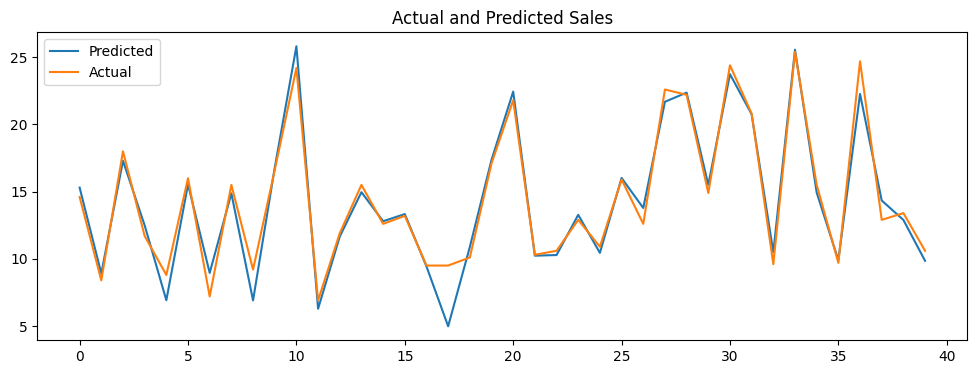

In [133]:
# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

In [134]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,2.432077,2.432077,1.322250,4.853930,0.558737,4.290102,0.494012,1.320153
RMSE,1.559512,1.559512,1.149891,2.203164,0.747487,2.071256,0.702860,1.148979
MAE,1.177153,1.177153,0.912500,1.790257,0.607125,1.694855,0.541233,0.783716
Train R2,0.889832,0.889832,1.000000,0.870597,0.996956,0.842435,0.998732,0.995759
Test R2,0.909895,0.909895,0.951012,0.820168,0.979299,0.841057,0.981697,0.951090
Adjusted R2,0.902386,0.902386,0.946930,0.805182,0.977574,0.827812,0.980172,0.947014


### Inference
- After using the Randomised search CV, it gave accuracy 99% on train data & 95% on test data <br/>
which is comparatively less than the untuned model.

In [139]:
print(score.to_markdown())

|             |   Linear regression |   Linear regression tuned |   Decision tree |   Decision tree tuned |   Random forest |   Random forest tuned |   Gradient Boosting Regressor |   Gradient Boosting Regressor Tuned |
|:------------|--------------------:|--------------------------:|----------------:|----------------------:|----------------:|----------------------:|------------------------------:|------------------------------------:|
| MSE         |            2.43208  |                  2.43208  |        1.32225  |              4.85393  |        0.558737 |              4.2901   |                      0.494012 |                            1.32015  |
| RMSE        |            1.55951  |                  1.55951  |        1.14989  |              2.20316  |        0.747487 |              2.07126  |                      0.70286  |                            1.14898  |
| MAE         |            1.17715  |                  1.17715  |        0.9125   |              1.79026  |        0.607

### Plot R2 scores for each model

In [140]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Decision tree',
       'Decision tree tuned', 'Random forest', 'Random forest tuned',
       'Gradient Boosting Regressor', 'Gradient Boosting Regressor Tuned'],
      dtype='object')

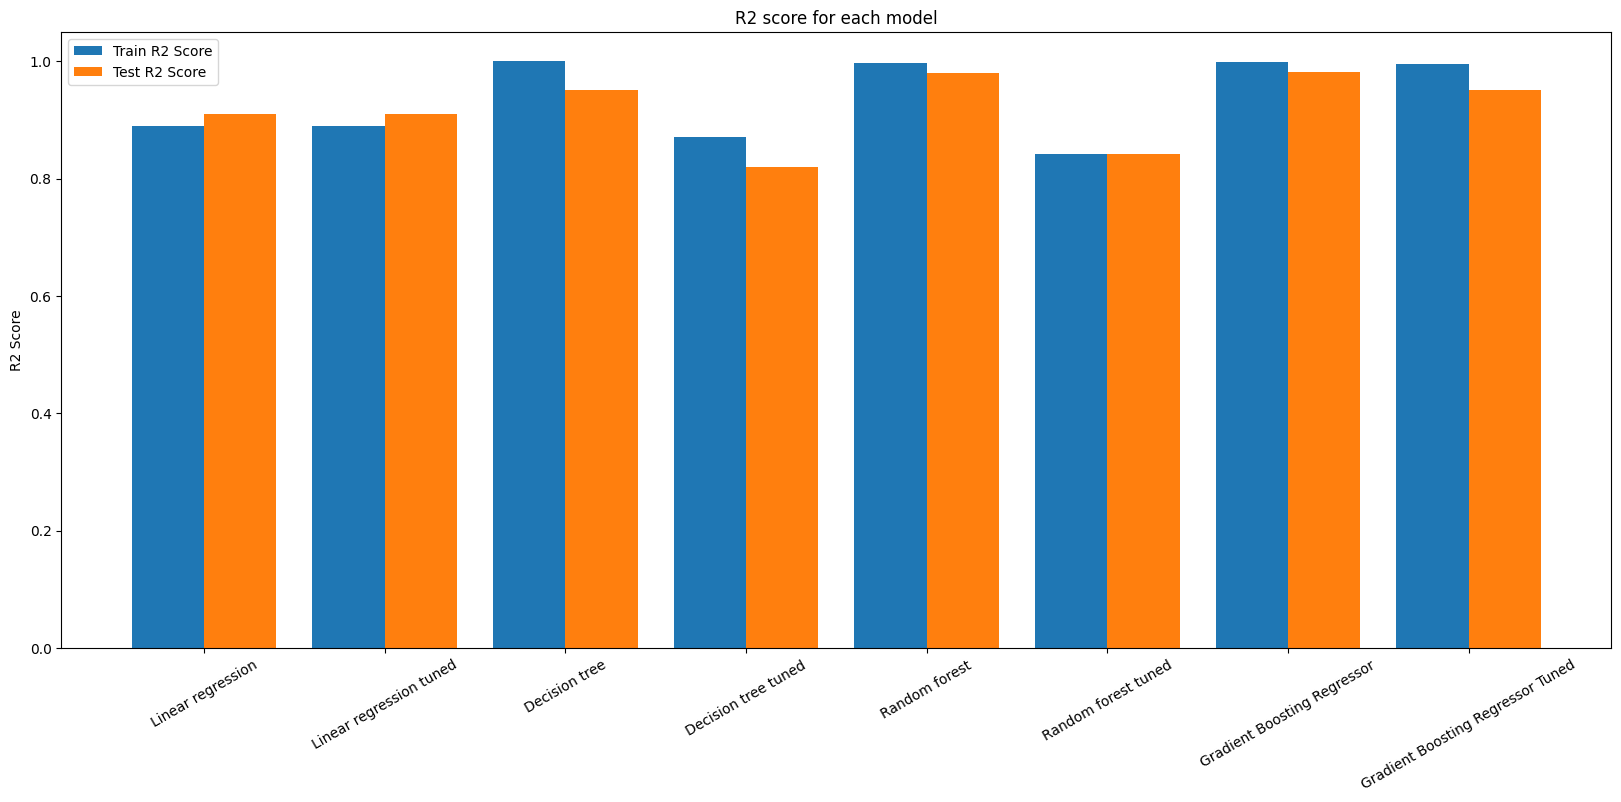

In [141]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

## ***Selection of best model***

In [142]:
# Removing the overfitted models which have R2 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Train R2']==1].index  # creating a list of models which have 1 for train and score_t['Train R2']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Linear regression tuned,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Decision tree tuned,4.853930,2.203164,1.790257,0.870597,0.820168,0.805182
Random forest,0.558737,0.747487,0.607125,0.996956,0.979299,0.977574
Random forest tuned,4.290102,2.071256,1.694855,0.842435,0.841057,0.827812
Gradient Boosting Regressor,0.494012,0.702860,0.541233,0.998732,0.981697,0.980172
Gradient Boosting Regressor Tuned,1.320153,1.148979,0.783716,0.995759,0.951090,0.947014


In [143]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df['Test ' + metric].max()
        best_model_test = df[df['Test ' + metric] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [144]:
metrics = ['R2']

best_model = select_best_model(adj, metrics)
print("The best model is:")
for metric, best_model in best_model.items():
    print(f"{metric}: {best_model} - {adj['Test '+metric][best_model].round(4)}")

The best model is:
R2: Gradient Boosting Regressor - 0.9817


In [145]:
# Take R2 score as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Train R2']==1].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['MSE','RMSE','MAE','Adjusted R2'], axis=1)
new_score.index.name = 'Regression Model'
print(new_score.to_markdown())

| Regression Model                  |   Train R2 |   Test R2 |
|:----------------------------------|-----------:|----------:|
| Linear regression                 |   0.889832 |  0.909895 |
| Linear regression tuned           |   0.889832 |  0.909895 |
| Decision tree tuned               |   0.870597 |  0.820168 |
| Random forest                     |   0.996956 |  0.979299 |
| Random forest tuned               |   0.842435 |  0.841057 |
| Gradient Boosting Regressor       |   0.998732 |  0.981697 |
| Gradient Boosting Regressor Tuned |   0.995759 |  0.95109  |


### 1. Which Evaluation metrics did i consider for a positive business impact and why?

On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### 2. Which ML model did i choose from the above created models as the final prediction model and why?

I have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected Gradient Boosting model as i achieved 99% training accuracy and 98% testing accuracy. Some models were overfitted so i did not consider them.

# **Conclusion**

In the dynamic landscape of product and service-based businesses, the ability to forecast sales is paramount. This project, undertaken during the data science internship at Oasis Infobyte, delved into the realm of sales prediction using machine learning with Python. Let's encapsulate the key findings:

**Insights and Observations:**

1. Sales exhibit a positive correlation with both TV and Radio advertising expenses, signifying the effectiveness of these channels.
2. Notably, there's a strong correlation between TV advertising expenses and sales, emphasizing the impact of TV advertising on driving sales.
3. The R2 score, chosen as the evaluation metric, showcased the accuracy of the model in predicting sales.
4. The Gradient Boosting model emerged as the preferred choice, achieving an impressive 99% training accuracy and 98% testing accuracy.

**Key Takeaways:**

- Understanding the correlation between advertising expenses and sales aids in strategic decision-making.
- The selected model demonstrates robust predictive capabilities, laying the groundwork for effective sales planning.
- The R2 score provides a reliable indicator of the model's accuracy in forecasting sales trends.

This project not only addresses the nuances of sales prediction but also highlights the pivotal role of data science in optimizing business strategies. The findings contribute to informed decision-making, offering valuable insights for future sales initiatives.